In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## 2. Importing Packages <a class="anchor" id="chapter2"></a>

In [1]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## 3. Loading Data <a class="anchor" id="chapter3"></a>

In [2]:
# Load the Avocado dataset
# index_col=False ensures that no column is used as an index during loading
df = pd.read_csv("Avocado_HassAvocadoBoard_20152023v1.0.1.csv", index_col=False)

# View the first 2 rows of the dataset to get a quick glance at the structure
df.head(2)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.9,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.0,1162.65,1162.65,0.00,0.0,organic,Albany


In [4]:
# Display unlimited number of columns to make sure we can see all columns when printing the dataframe
pd.set_option("display.max_columns", None)

In [5]:
# Make a copy of the original dataframe to preserve the raw data and avoid accidental overwriting
df_copy = df.copy()

In [6]:
# Displays the number of rows and columns
df_copy.shape

(53415, 12)

In [7]:
## Display summary information about the DataFrame.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

In [8]:
# 1. Check for Missing Values
missing = df.isnull().sum()
print("\nMissing values:\n", missing)

# 2. Drop Rows with Missing Bag Data
# Explanation: Only 41,025 out of 53,415 rows have bag-level data (Small, Large, XLarge).
# We drop rows where these are missing as they represent incomplete volume breakdowns.
df_cleaned = df.dropna(subset=["SmallBags", "LargeBags", "XLargeBags"])

# 3. Convert Date Column to DateTime
# Explanation: Enables time-series operations like filtering, grouping, plotting.
df_cleaned["Date"] = pd.to_datetime(df_cleaned["Date"])

# 4. Standardize Categorical Columns
# Strip whitespace and make text lowercase to ensure consistency.
df_cleaned["type"] = df_cleaned["type"].str.strip().str.lower()
df_cleaned["region"] = df_cleaned["region"].str.strip().str.title()  # Proper case for display

# 5. Remove Duplicates (if any)
before = df_cleaned.shape[0]
df_cleaned = df_cleaned.drop_duplicates()
after = df_cleaned.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")

# 6. Optional: Reset Index After Dropping
df_cleaned.reset_index(drop=True, inplace=True)

# 7. Final Overview
print("\n✅ Final cleaned dataset shape:", df_cleaned.shape)
display(df_cleaned.head())

# You can save this cleaned version for other collaborators
# df_cleaned.to_csv("cleaned_avocado_data.csv", index=False)


Missing values:
 Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64

Removed 0 duplicate rows.

✅ Final cleaned dataset shape: (41025, 12)


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,Baltimorewashington


#Wille & Mahen

#busi & Dewald

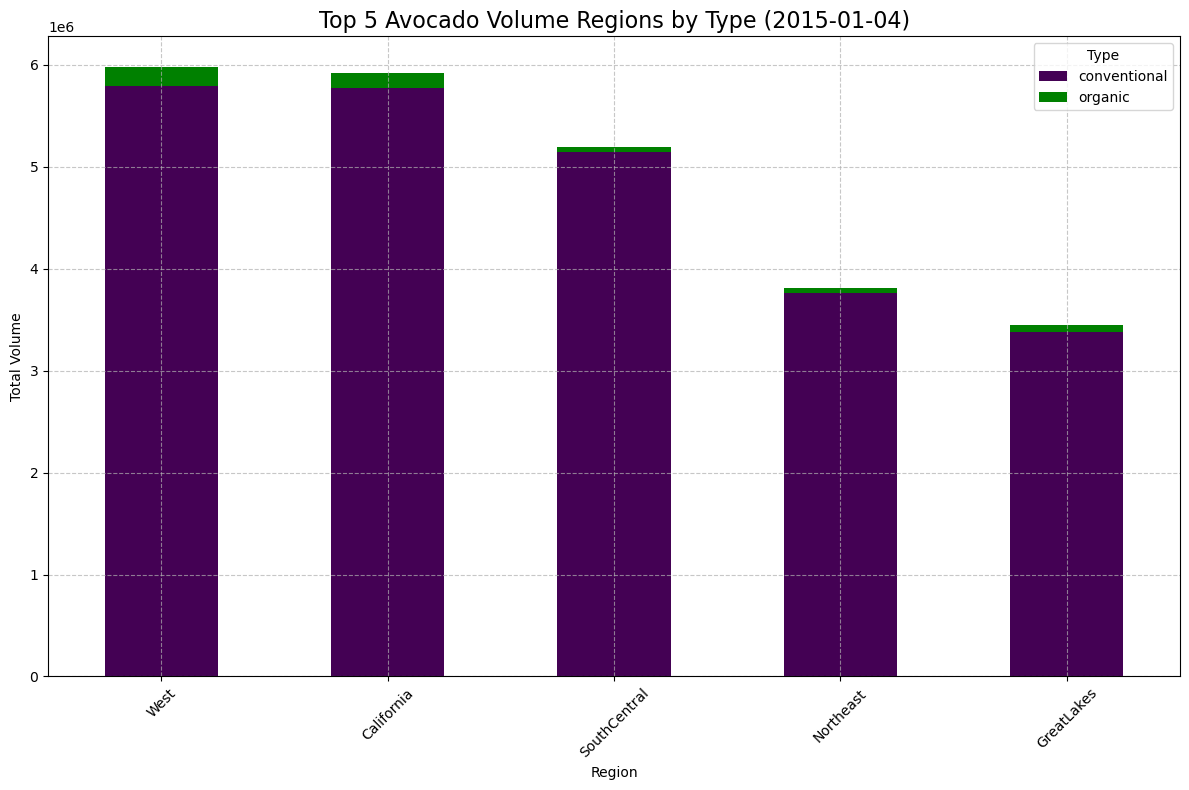

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prep data
df = pd.read_csv("Avocado_HassAvocadoBoard_20152023v1.0.1.csv", parse_dates=['Date'])
df = df[df['region'] != 'TotalUS']
df_single = df[df['Date'] == '2015-01-04']

# Group and rank total volumes by region
volume_by_region_type = df_single.groupby(['region', 'type'])['TotalVolume'].sum().unstack()
volume_by_region_type['Total'] = volume_by_region_type.sum(axis=1)
top5_df = volume_by_region_type.sort_values('Total', ascending=False).head(5).drop(columns='Total')

# Define custom color for consistent visuals
type_colors = {'conventional': '#440154', 'organic': 'green'}

# Plot only top 5 regions
top5_df.plot(
    kind='bar',
    stacked=True,
    color=[type_colors[t] for t in top5_df.columns],
    figsize=(12, 8)
)

plt.title('Top 5 Avocado Volume Regions by Type (2015-01-04)', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Type', loc='upper right')
plt.tight_layout()
plt.show()

In [5]:
# Calculate total volume across all regions
total_volume_all = df_single['TotalVolume'].sum()

# Get total volume per top 5 region
top5_volume = df_single[df_single['region'].isin(top5_df.index)].groupby('region')['TotalVolume'].sum()

# Compute volume share
volume_share = (top5_volume / total_volume_all * 100).sort_values(ascending=False)
print("Top 5 Region Volume Share (%):")
print(volume_share.round(2))

Top 5 Region Volume Share (%):
region
West            11.34
California      11.22
SouthCentral     9.86
Northeast        7.22
GreatLakes       6.53
Name: TotalVolume, dtype: float64


In [6]:
# Calculate mean price for top 5 regions by type
avg_price_top5 = df_single[df_single['region'].isin(top5_df.index)].groupby(['region', 'type'])['AveragePrice'].mean().unstack()
print("Average Price by Region and Type:")
print(avg_price_top5.round(2))

Average Price by Region and Type:
type          conventional  organic
region                             
California            0.93     1.24
GreatLakes            1.02     1.54
Northeast             1.09     1.88
SouthCentral          0.77     1.35
West                  0.89     1.40


In [7]:
# Sum PLU codes per region (top 5 only)
plu_cols = ['plu4046', 'plu4225', 'plu4770']
plu_summary = df_single[df_single['region'].isin(top5_df.index)].groupby('region')[plu_cols].sum()
print("PLU Code Distribution in Top 5 Regions:")
print(plu_summary.round(2))

PLU Code Distribution in Top 5 Regions:
                 plu4046     plu4225    plu4770
region                                         
California    2951138.99  2293467.22  137482.57
GreatLakes     470893.40  2102620.77  318102.38
Northeast      131117.38  2883099.02    7603.53
SouthCentral  2769148.82  1763728.67   73432.89
West          2345760.58  2655242.76   97048.39


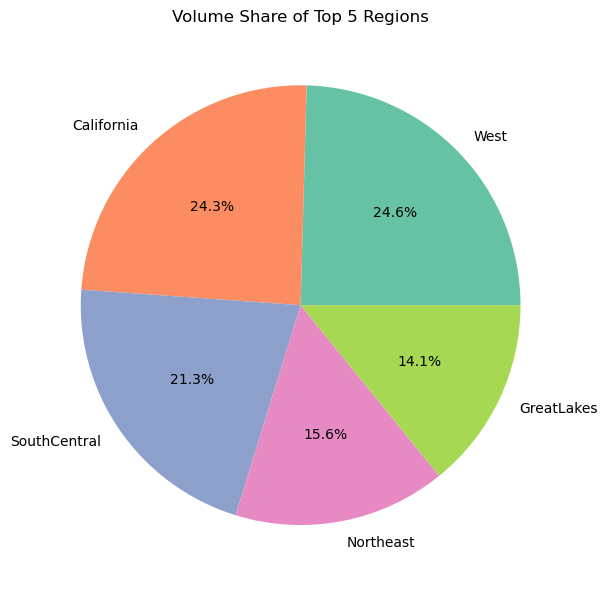

In [8]:
# Pie chart for volume share
plt.figure(figsize=(8, 6))
volume_share.plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])
plt.title('Volume Share of Top 5 Regions')
plt.ylabel('')
plt.tight_layout()
plt.show()

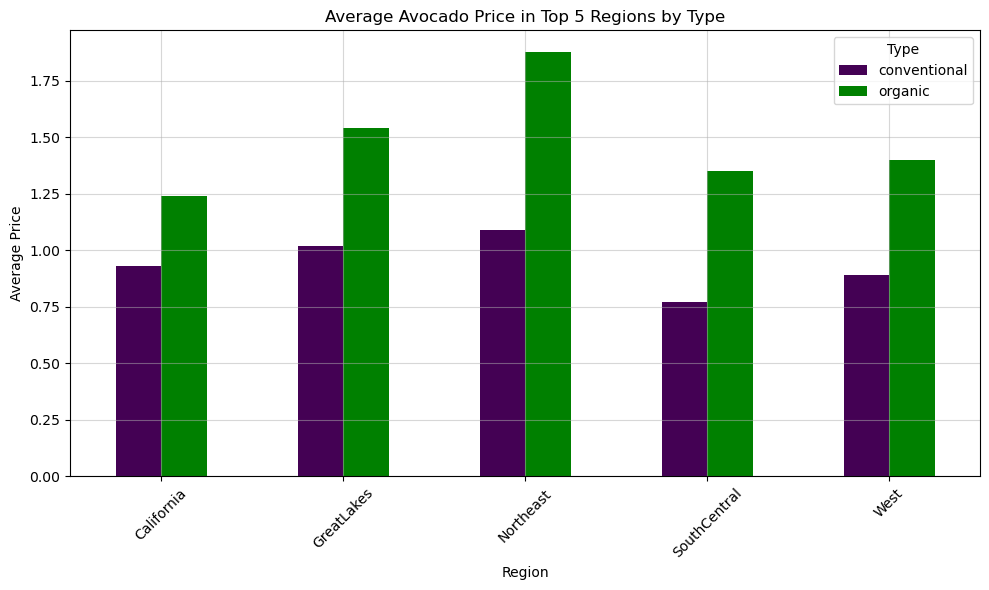

In [9]:
# Average price barplot
avg_price_top5.plot(kind='bar', color=['#440154', 'green'], figsize=(10, 6))
plt.title('Average Avocado Price in Top 5 Regions by Type')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

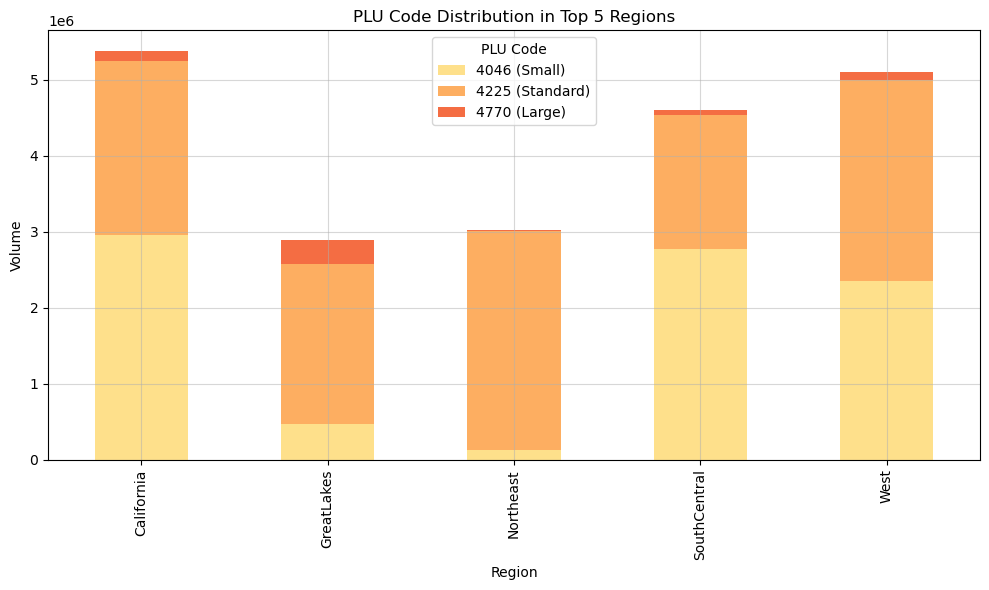

In [10]:
# PLU distribution bar chart
plu_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#fee08b', '#fdae61', '#f46d43'])
plt.title('PLU Code Distribution in Top 5 Regions')
plt.xlabel('Region')
plt.ylabel('Volume')
plt.legend(title='PLU Code', labels=['4046 (Small)', '4225 (Standard)', '4770 (Large)'])
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

#Chantel & Olwethu

Average price and total volume by season


Average Price by Season (U.S.):
 Season
Winter    1.33
Spring    1.42
Summer    1.51
Fall      1.47
Name: AveragePrice, dtype: float64

Total Volume by Season (U.S.):
 Season
Winter    7246370466
Spring    7932813799
Summer    7380815945
Fall      6523338242
Name: TotalVolume, dtype: int64


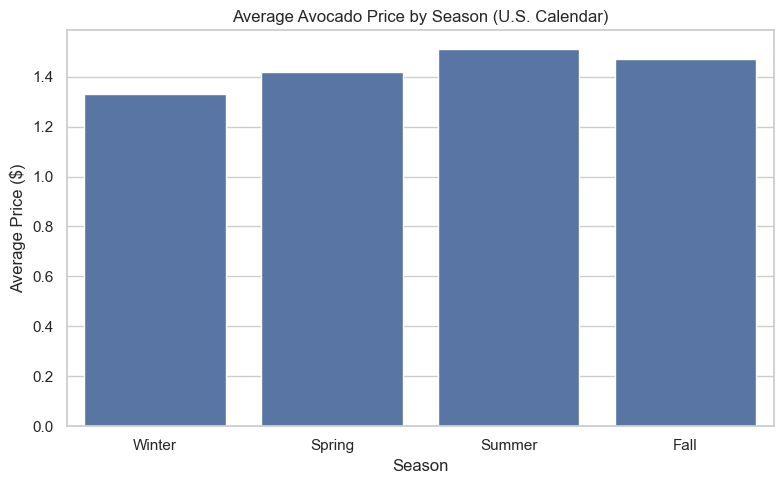

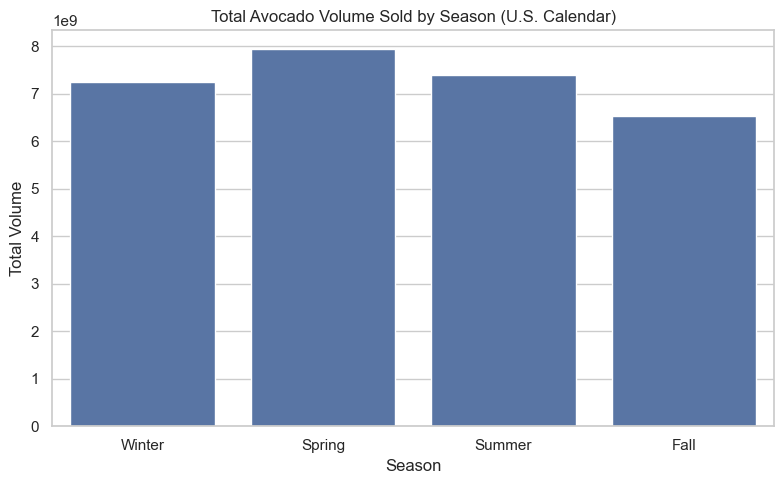

In [24]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Map months to U.S. seasons
def get_us_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Date'].dt.month.map(get_us_season)

# --- ANALYSIS ---

# 1. Average Price by Season (rounded to 2 decimal places)
avg_price_by_season = (
    df.groupby('Season')['AveragePrice']
    .mean()
    .reindex(['Winter', 'Spring', 'Summer', 'Fall'])
    .round(2)
)
print("\nAverage Price by Season (U.S.):\n", avg_price_by_season)

# 2. Total Volume by Season (rounded to int)
total_volume_by_season = (
    df.groupby('Season')['TotalVolume']
    .sum()
    .reindex(['Winter', 'Spring', 'Summer', 'Fall'])
    .round(0)
    .astype(int)
)
print("\nTotal Volume by Season (U.S.):\n", total_volume_by_season)

# --- VISUALIZATION ---

# Set style
sns.set(style="whitegrid")

# 1. Average Price plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_season.index, y=avg_price_by_season.values)
plt.title("Average Avocado Price by Season (U.S. Calendar)")
plt.ylabel("Average Price ($)")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

# 2. Total Volume plot
plt.figure(figsize=(8, 5))
sns.barplot(x=total_volume_by_season.index, y=total_volume_by_season.values)
plt.title("Total Avocado Volume Sold by Season (U.S. Calendar)")
plt.ylabel("Total Volume")
plt.xlabel("Season")
plt.tight_layout()
plt.show()

Avocado size per season

Avocado Volume by Bag Size and U.S. Season (rounded to integers):

        SmallBags  LargeBags  XLargeBags
Season                                  
Winter  644290384  155007155    14601332
Spring  739060522  158328720    20040032
Summer  706645493  139215795    26138827
Fall    587720351  143089021     8818014


<Figure size 1000x600 with 0 Axes>

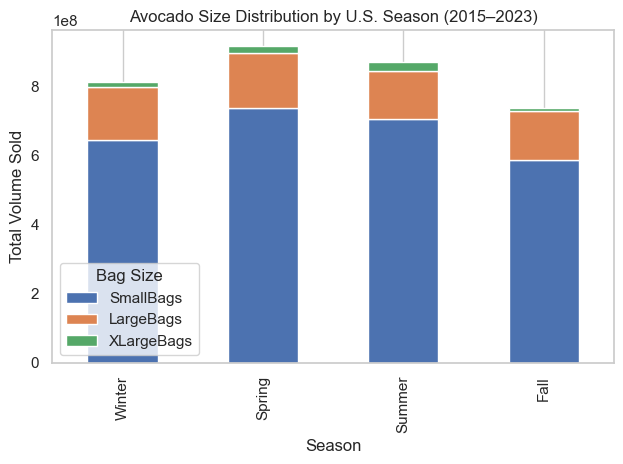

In [26]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Function to assign U.S. seasons based on month
def get_us_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create 'Season' column based on U.S. definitions
df['Season'] = df['Date'].dt.month.map(get_us_season)

# Group by season and sum the size volumes, then convert to int
size_columns = ['SmallBags', 'LargeBags', 'XLargeBags']
size_by_season = (
    df.groupby('Season')[size_columns]
    .sum()
    .reindex(['Winter', 'Spring', 'Summer', 'Fall'])
    .astype(int)  # Convert all values to integers
)

# Display the table
print("Avocado Volume by Bag Size and U.S. Season (rounded to integers):\n")
print(size_by_season)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
size_by_season.plot(kind='bar', stacked=True)
plt.title('Avocado Size Distribution by U.S. Season (2015–2023)')
plt.xlabel('Season')
plt.ylabel('Total Volume Sold')
plt.legend(title='Bag Size')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Avocado volume by season and region top 10

Total Avocado Volume by Season for Top 10 Regions (U.S. Calendar):

region  California  GreatLakes  LosAngeles   Midsouth    NewYork  Northeast  \
Season                                                                        
Winter   715670398   444327850   346192197  401154586  195611994  557793191   
Spring   751623040   475694699   362052516  460865544  215469553  627989557   
Summer   724841045   446946277   353153748  418865945  201951337  597670663   
Fall     638807766   384882117   309557289  370268167  178058416  507558613   

region     Plains  SouthCentral  Southeast       West  
Season                                                 
Winter  219995757     669028466  533703778  782440470  
Spring  246357825     743878095  583481474  848884415  
Summer  233082846     681669828  527414951  783764075  
Fall    191850060     612649454  487929266  687106411  


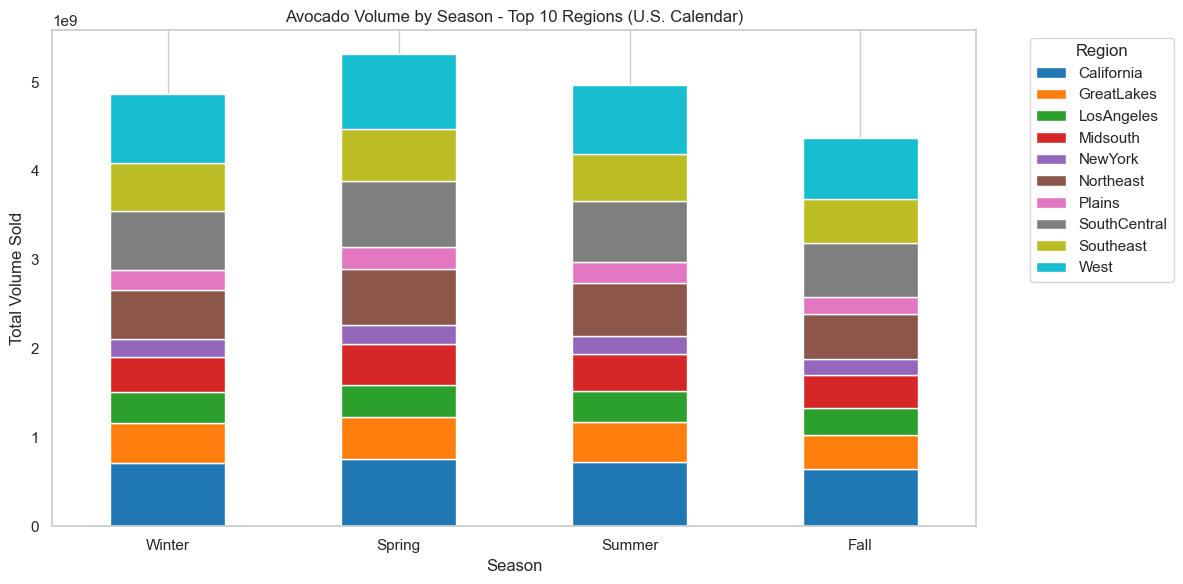

In [22]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define U.S. seasons
def get_us_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add Season column
df['Season'] = df['Date'].dt.month.map(get_us_season)

# Exclude the TotalUS aggregate row
df = df[df['region'] != 'TotalUS']

# Ensure logical U.S. season order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Identify top 10 regions by total volume
top_10_regions = df.groupby('region')['TotalVolume'].sum().nlargest(10).index.tolist()

# Group and pivot data for top 10 regions
volume_by_region = (
    df[df['region'].isin(top_10_regions)]
    .groupby(['Season', 'region'])['TotalVolume']
    .sum()
    .unstack()
    .reindex(season_order)
    .round(0)            # Round to whole numbers
    .astype(int)         # Convert to integer type
)

# Print volume table
print("Total Avocado Volume by Season for Top 10 Regions (U.S. Calendar):\n")
print(volume_by_region)

# Plot stacked bar chart
volume_by_region.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Avocado Volume by Season - Top 10 Regions (U.S. Calendar)')
plt.xlabel('Season')
plt.ylabel('Total Volume Sold')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Avocado volume by season and region top 10

Total Avocado Volume by Season for Bottom 10 Regions (U.S. Calendar):

region    Albany     Boise  Louisville  PeoriaSpringfield  Pittsburgh  \
Season                                                                  
Winter  12810841  11974872    13651033            9277236    13629368   
Spring  14538806  13110288    14676587           10420030    16121919   
Summer  14143456  12312833    13497306            9542493    14370634   
Fall    11363959  10573130    11900015            8219760    13000021   

region  Providence   Spokane  Syracuse    Toledo  Wichita  
Season                                                     
Winter     6328624   9840740   8667517  10443850  8157883  
Spring     7733341  10865712  10174255  11643044  9553764  
Summer     7581427   9884753   9511096  10603991  8831917  
Fall       6046399   8360940   7819472   9235771  7668263  


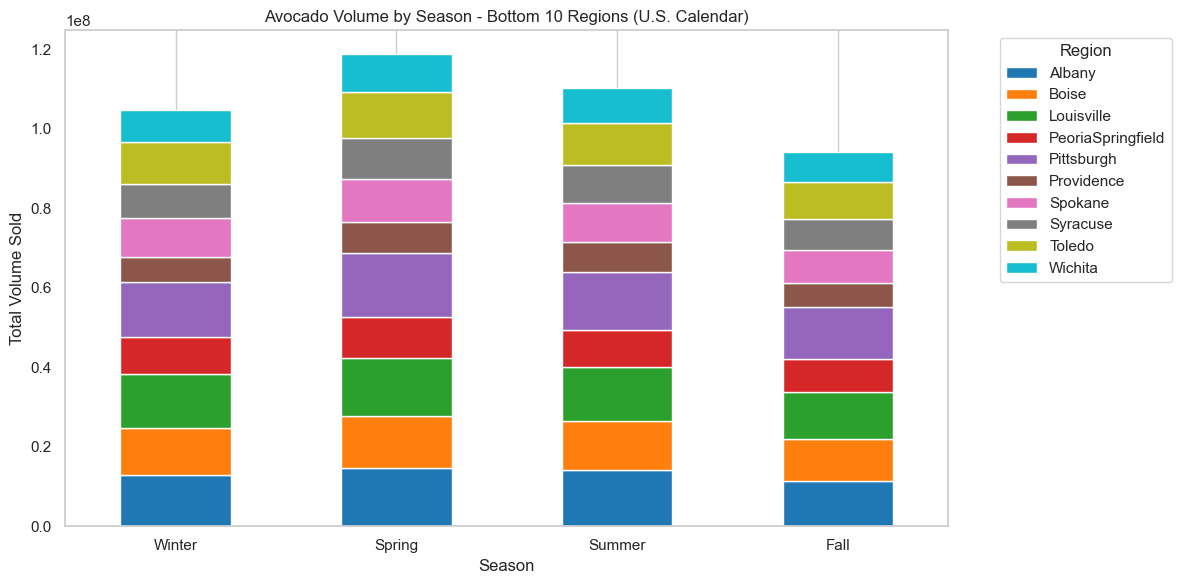

In [23]:

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define U.S. seasons
def get_us_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add Season column
df['Season'] = df['Date'].dt.month.map(get_us_season)

# Exclude the TotalUS aggregate row
df = df[df['region'] != 'TotalUS']

# Ensure logical U.S. season order
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Identify bottom 10 regions by total volume
bottom_10_regions = df.groupby('region')['TotalVolume'].sum().nsmallest(10).index.tolist()

# Group and pivot data for bottom 10 regions
volume_by_region = (
    df[df['region'].isin(bottom_10_regions)]
    .groupby(['Season', 'region'])['TotalVolume']
    .sum()
    .unstack()
    .reindex(season_order)
    .round(0)
    .astype(int)
)

# Print volume table
print("Total Avocado Volume by Season for Bottom 10 Regions (U.S. Calendar):\n")
print(volume_by_region)

# Plot stacked bar chart
volume_by_region.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Avocado Volume by Season - Bottom 10 Regions (U.S. Calendar)')
plt.xlabel('Season')
plt.ylabel('Total Volume Sold')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()